In [1]:
!pip install spotipy


In [2]:
!pip install pandas

In [3]:
#Operaciones matematicas, graficos y visualizacion de datos
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

In [5]:
client_id = "b94b318bdd6440e48f53f2caadd9e065" # Cambiar por tu Client ID
client_secret = "db2aa700e98c417bbb5aae8530e256d4" # Cambiar por tu Client Secret

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [6]:
results = sp.search(q='Pedro Suárez-Vértiz', limit=1, type='artist')
artist_id = results['artists']['items'][0]['id']
artist_id

'3Azj8v21CQ76AVvjuNv5Vg'

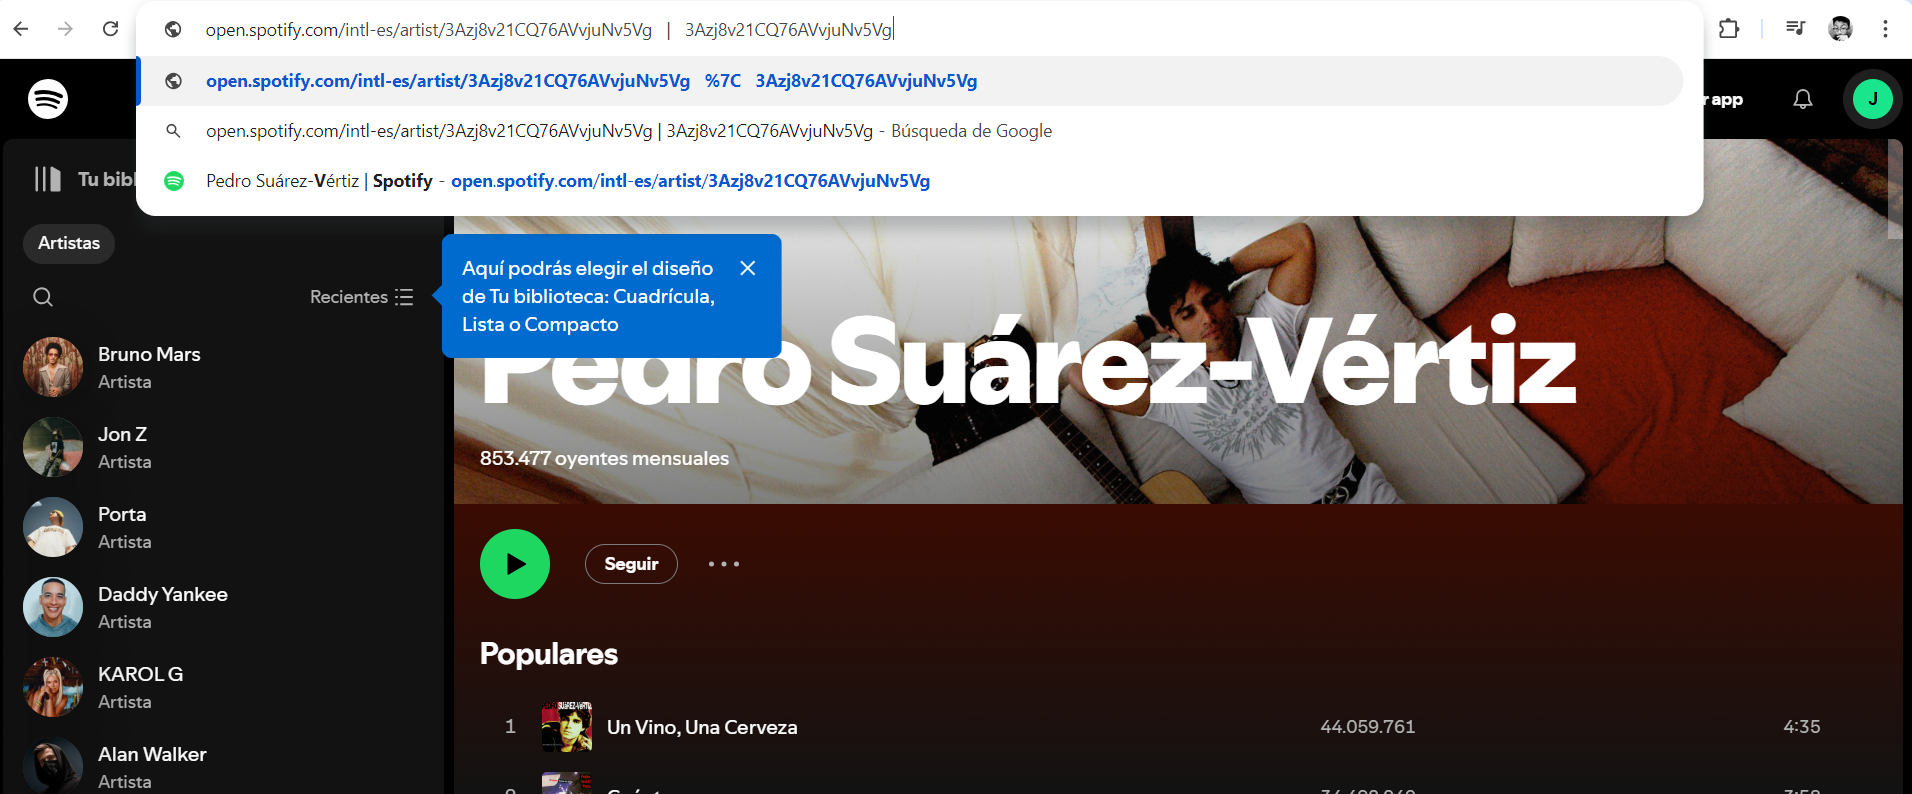

In [7]:
albums = sp.artist_albums(artist_id, album_type='album')
for album in albums['items']:
    print(album['name'])

30 Grandes Éxitos Pedro Suárez-Vertiz
Pedro Suárez Vértiz para Bebés (Vol.1)
Amazonas (Uncut)
Amazonas
Pedro Suárez-Vértiz
Talk Show
Play
Degeneracion Actual
Póntelo en la Lengua
(No Existen) Técnicas para Olvidar


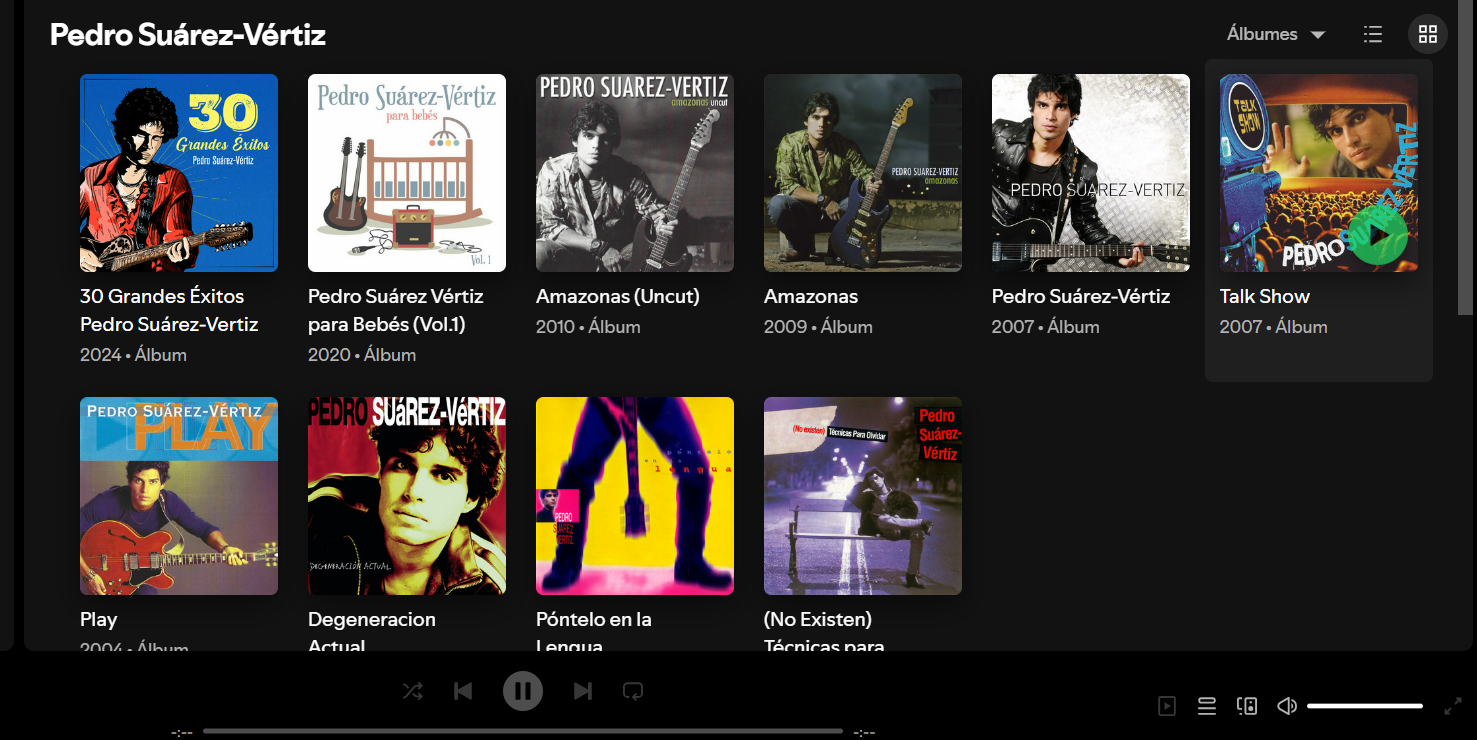

In [8]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [9]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


nombre_artista           nombre_cancion              id_cancion  \
0     Noah Kahan             Stick Season  0mflMxspEfB0VbI1kyLiAv   
1     Zach Bryan  Something in the Orange  3WMj8moIAXJhHsyLaqIIHI   
2     Zach Bryan                Sun to Me  1SjsVdSXpwm1kTdYEHoPIT   
3            Djo         End of Beginning  3qhlB30KknSejmIvZZLjOD   
4     Zach Bryan       Oklahoma Smokeshow  0OWhKvvsHptt6vnnNUSM9a   

   popularidad_cancion              id_artista  
0                   89  2RQXRUsr4IW1f3mKyKsy4B  
1                   87  40ZNYROS4zLfyyBSs2PGe2  
2                   84  40ZNYROS4zLfyyBSs2PGe2  
3                   92  5p9HO3XC5P3BLxJs5Mtrhm  
4                   82  40ZNYROS4zLfyyBSs2PGe2

In [10]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a) 
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [11]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

nombre_artista           nombre_cancion              id_cancion  \
0     Noah Kahan             Stick Season  0mflMxspEfB0VbI1kyLiAv   
1     Zach Bryan  Something in the Orange  3WMj8moIAXJhHsyLaqIIHI   
2     Zach Bryan                Sun to Me  1SjsVdSXpwm1kTdYEHoPIT   
3            Djo         End of Beginning  3qhlB30KknSejmIvZZLjOD   
4     Zach Bryan       Oklahoma Smokeshow  0OWhKvvsHptt6vnnNUSM9a   

   popularidad_cancion              id_artista  popularidad_artista  \
0                   89  2RQXRUsr4IW1f3mKyKsy4B                   87   
1                   87  40ZNYROS4zLfyyBSs2PGe2                   91   
2                   84  40ZNYROS4zLfyyBSs2PGe2                   91   
3                   92  5p9HO3XC5P3BLxJs5Mtrhm                   76   
4                   82  40ZNYROS4zLfyyBSs2PGe2                   91   

                       generos_artista  seguidores_artista  
0  [pov: indie, singer-songwriter pop]             3353913  
1           [classic oklahoma country]             5050464  
2           [classic oklahoma country]             5050464  
3        [pov: indie, psychedelic pop]             1521755  
4           [classic oklahoma country]             5050464

In [12]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

In [13]:
print(variables_cancion[0][0].keys())


dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [14]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [15]:
data_list = []

# Revisa el contenido de variables_cancion
for variables in variables_cancion:
    if variables is not None:  # Verificar si no es None
        for var in variables:
            if var is not None:  # Verificar si var no es None
                print(var)  # Esto es para depurar y ver el contenido de var
                data_list.append(var)

# Si la lista no está vacía, convertirla en un DataFrame y sino no hace nada
if data_list:
    tf_df = pd.DataFrame(data_list, columns=tf_df.columns)

# Ver el DataFrame resultante 
print(tf_df)

{'danceability': 0.664, 'energy': 0.5, 'key': 9, 'loudness': -6.935, 'mode': 1, 'speechiness': 0.0651, 'acousticness': 0.799, 'instrumentalness': 0, 'liveness': 0.0966, 'valence': 0.801, 'tempo': 117.896, 'type': 'audio_features', 'id': '0mflMxspEfB0VbI1kyLiAv', 'uri': 'spotify:track:0mflMxspEfB0VbI1kyLiAv', 'track_href': 'https://api.spotify.com/v1/tracks/0mflMxspEfB0VbI1kyLiAv', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0mflMxspEfB0VbI1kyLiAv', 'duration_ms': 182347, 'time_signature': 4}
{'danceability': 0.369, 'energy': 0.192, 'key': 4, 'loudness': -12.151, 'mode': 0, 'speechiness': 0.04, 'acousticness': 0.555, 'instrumentalness': 8.35e-06, 'liveness': 0.0954, 'valence': 0.148, 'tempo': 175.212, 'type': 'audio_features', 'id': '3WMj8moIAXJhHsyLaqIIHI', 'uri': 'spotify:track:3WMj8moIAXJhHsyLaqIIHI', 'track_href': 'https://api.spotify.com/v1/tracks/3WMj8moIAXJhHsyLaqIIHI', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3WMj8moIAXJhHsyLaqIIHI', 'duration_ms

In [16]:
tf_df.head()


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.664   0.500    9    -6.935     1       0.0651        0.7990   
1         0.369   0.192    4   -12.151     0       0.0400        0.5550   
2         0.505   0.270    9    -9.165     0       0.0333        0.5930   
3         0.689   0.454    2    -7.643     1       0.0584        0.0351   
4         0.544   0.573    8    -5.694     1       0.0356        0.0958   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.0966    0.801  117.896  audio_features   
1          0.000008    0.0954    0.148  175.212  audio_features   
2          0.000000    0.1330    0.557   98.721  audio_features   
3          0.002590    0.0707    0.912  159.982  audio_features   
4          0.000000    0.1040    0.233  122.977  audio_features   

                       id                                   uri  \
0  0mflMxspEfB0VbI1kyLiAv  spotify:track:0mflMxspEfB0VbI1kyLiAv   
1  3WMj8moIAXJhHsyLaqIIHI  spotify:track:3WMj8moIAXJhHsyLaqIIHI   
2  1SjsVdSXpwm1kTdYEHoPIT  spotify:track:1SjsVdSXpwm1kTdYEHoPIT   
3  3qhlB30KknSejmIvZZLjOD  spotify:track:3qhlB30KknSejmIvZZLjOD   
4  0OWhKvvsHptt6vnnNUSM9a  spotify:track:0OWhKvvsHptt6vnnNUSM9a   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0mflMxspEfB0...   
1  https://api.spotify.com/v1/tracks/3WMj8moIAXJh...   
2  https://api.spotify.com/v1/tracks/1SjsVdSXpwm1...   
3  https://api.spotify.com/v1/tracks/3qhlB30KknSe...   
4  https://api.spotify.com/v1/tracks/0OWhKvvsHptt...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/0mfl...       182347   
1  https://api.spotify.com/v1/audio-analysis/3WMj...       228013   
2  https://api.spotify.com/v1/audio-analysis/1Sjs...       163032   
3  https://api.spotify.com/v1/audio-analysis/3qhl...       159246   
4  https://api.spotify.com/v1/audio-analysis/0OWh...       211739   

   time_signature  
0               4  
1               3  
2               4  
3               4  
4               4

In [17]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      989 non-null    float64
 1   energy            989 non-null    float64
 2   loudness          989 non-null    float64
 3   spee

In [18]:
track_df['nombre_artista'] = track_df['nombre_artista'].astype("string")
track_df['nombre_cancion'] = track_df['nombre_cancion'].astype("string")
track_df['id_cancion'] = track_df['id_cancion'].astype("string")
track_df['id_artista'] = track_df['id_artista'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   string
 1   nombre_cancion       1000 non-null   string
 2   id_cancion           1000 non-null   string
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   string
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      989 non-null    float64 
 1   energy            989 non-null    float64 
 2   loudness          989 non-null    fl

In [19]:
top_canciones = track_df.sort_values(by=['popularidad_cancion'], ascending=False)[['nombre_cancion', 'nombre_artista', 'popularidad_cancion']].head(20)
top_canciones.index = np.arange(1, len(top_canciones)+1)
top_canciones

nombre_cancion     nombre_artista  \
1                                    End of Beginning                Djo   
2                                           As It Was       Harry Styles   
3                                        Stick Season         Noah Kahan   
4                                     I'm Good (Blue)       David Guetta   
5                                            Nonsense  Sabrina Carpenter   
6                             Something in the Orange         Zach Bryan   
7                                           Kill Bill                SZA   
8                                   Romantic Homicide               d4vd   
9                                              Snooze                SZA   
10                                 Deep Phase Noise 1       Milli Hughes   
11                                      The Astronaut                JIN   
12                                    Me Porto Bonito          Bad Bunny   
13                                     Nobody Gets Me                SZA   
14                                          Sun to Me         Zach Bryan   
15                    WAIT FOR U (feat. Drake & Tems)             Future   
16                                           snowfall           Øneheart   
17                                          Anti-Hero       Taylor Swift   
18                                        double take              Dhruv   
19                                      Ojitos Lindos          Bad Bunny   
20  Too Many Nights (feat. Don Toliver & with Future)       Metro Boomin   

    popularidad_cancion  
1                    92  
2                    89  
3                    89  
4                    88  
5                    88  
6                    87  
7                    87  
8                    86  
9                    86  
10                   86  
11                   85  
12                   84  
13                   84  
14                   84  
15                   84  
16                   84  
17                   84  
18                   83  
19                   83  
20                   83

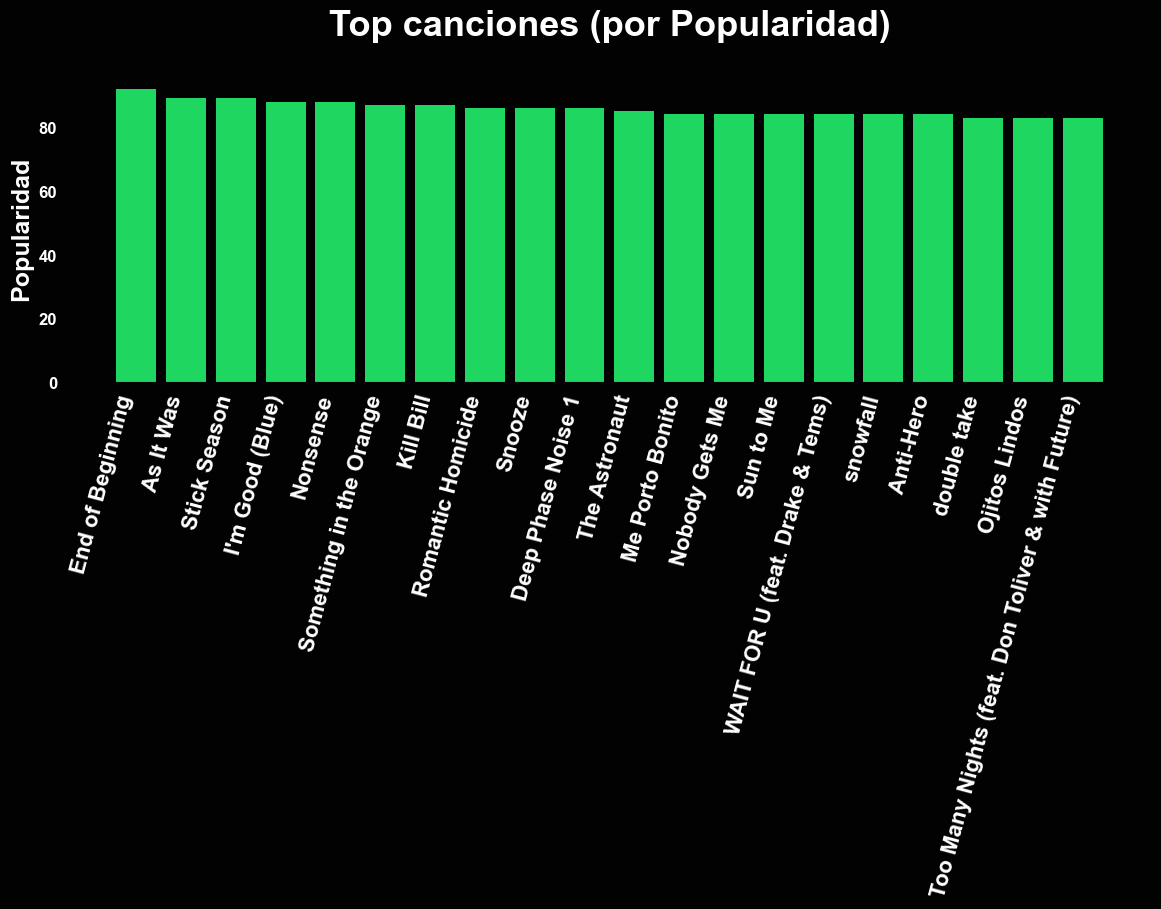

In [20]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones (por Popularidad)", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

In [21]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['seguidores_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

nombre_artista  seguidores_artista popularidad_artista  \
1      Taylor Swift           121433970                 100   
2     Billie Eilish            99430059                  95   
3             Drake            91824203                  96   
4        The Weeknd            90925319                  95   
5         Bad Bunny            85506215                  95   
6               BTS            75791668                  87   
7   Imagine Dragons            54492490                  88   
8         BLACKPINK            50887181                  81   
9           KAROL G            50240102                  92   
10     XXXTENTACION            46615731                  88   
11      Post Malone            45328102                  93   
12     Shawn Mendes            43202579                  84   
13          Beyoncé            38556097                  86   
14            Ozuna            37367828                  87   
15       Juice WRLD            35298517                  87   
16       Marshmello            33793455                  84   
17   Camila Cabello            33732074                  82   
18     Harry Styles            32868013                  84   
19   Kendrick Lamar            32783461                  92   
20      Nicki Minaj            32276166                  86   

                                      generos_artista  
1                                             ['pop']  
2                                  ['art pop', 'pop']  
3   ['canadian hip hop', 'canadian pop', 'hip hop'...  
4   ['canadian contemporary r&b', 'canadian pop', ...  
5       ['reggaeton', 'trap latino', 'urbano latino']  
6                 ['k-pop', 'k-pop boy group', 'pop']  
7                      ['modern rock', 'pop', 'rock']  
8                ['k-pop', 'k-pop girl group', 'pop']  
9   ['reggaeton', 'reggaeton colombiano', 'urbano ...  
10                ['emo rap', 'miami hip hop', 'rap']  
11           ['dfw rap', 'melodic rap', 'pop', 'rap']  
12               ['canadian pop', 'pop', 'viral pop']  
13                                     ['pop', 'r&b']  
14  ['puerto rican pop', 'reggaeton', 'trap latino...  
15              ['chicago rap', 'melodic rap', 'rap']  
16  ['brostep', 'edm', 'pop', 'progressive electro...  
17                               ['dance pop', 'pop']  
18                                            ['pop']  
19  ['conscious hip hop', 'hip hop', 'rap', 'west ...  
20        ['hip pop', 'pop', 'queens hip hop', 'rap']

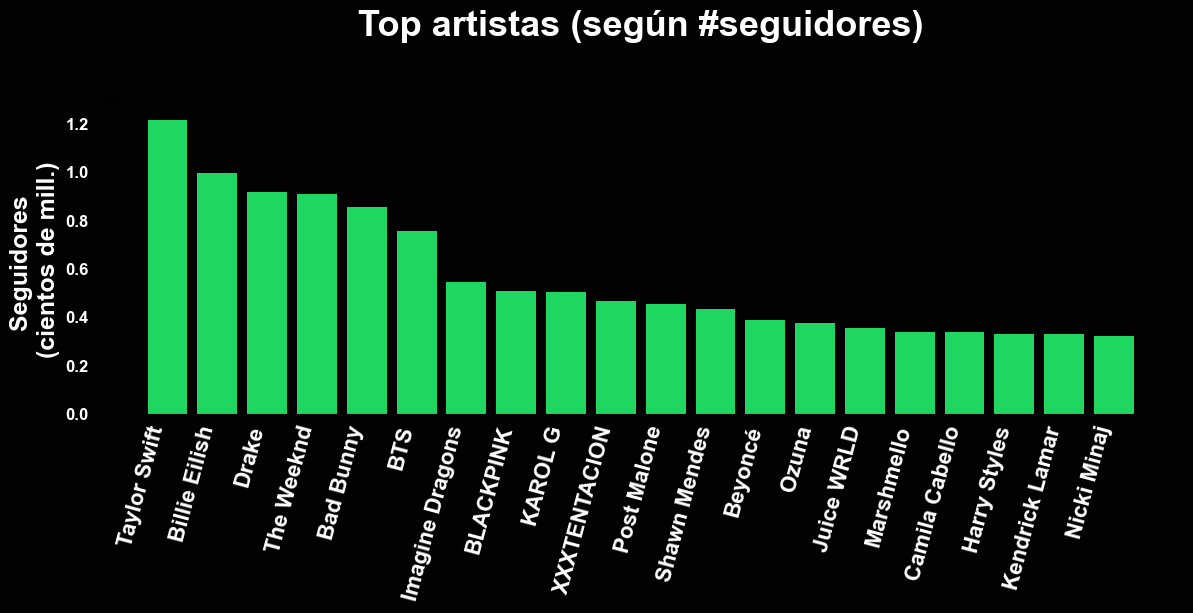

In [22]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['seguidores_artista'], color='#1ED660')
ax.set_ylabel("Seguidores \n(cientos de mill.)", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según #seguidores)", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

In [23]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

nombre_artista seguidores_artista  popularidad_artista  \
1        Taylor Swift          121433970                  100   
2               Drake           91824203                   96   
3           Bad Bunny           85506215                   95   
4   Sabrina Carpenter           12440500                   95   
5          The Weeknd           90925319                   95   
6       Billie Eilish           99430059                   95   
7          Peso Pluma           16020308                   93   
8         Post Malone           45328102                   93   
9          Kanye West           27072644                   93   
10     Kendrick Lamar           32783461                   92   
11            KAROL G           50240102                   92   
12               Feid           13691078                   92   
13         Zach Bryan            5050464                   91   
14             Future           18509265                   91   
15      Morgan Wallen           10610365                   91   
16                SZA           23013017                   90   
17       Metro Boomin            9174052                   90   
18           Junior H           18863185                   90   
19       David Guetta           26169236                   90   
20     Rauw Alejandro           23370960                   89   

                                      generos_artista  
1                                             ['pop']  
2   ['canadian hip hop', 'canadian pop', 'hip hop'...  
3       ['reggaeton', 'trap latino', 'urbano latino']  
4                                             ['pop']  
5   ['canadian contemporary r&b', 'canadian pop', ...  
6                                  ['art pop', 'pop']  
7               ['corridos tumbados', 'sad sierreno']  
8            ['dfw rap', 'melodic rap', 'pop', 'rap']  
9                   ['chicago rap', 'hip hop', 'rap']  
10  ['conscious hip hop', 'hip hop', 'rap', 'west ...  
11  ['reggaeton', 'reggaeton colombiano', 'urbano ...  
12  ['colombian pop', 'pop reggaeton', 'reggaeton'...  
13                       ['classic oklahoma country']  
14  ['atl hip hop', 'hip hop', 'rap', 'southern hi...  
15                           ['contemporary country']  
16                              ['pop', 'r&b', 'rap']  
17                                            ['rap']  
18  ['corrido', 'corridos tumbados', 'musica mexic...  
19  ['big room', 'dance pop', 'edm', 'pop', 'pop d...  
20  ['puerto rican pop', 'reggaeton', 'trap latino...

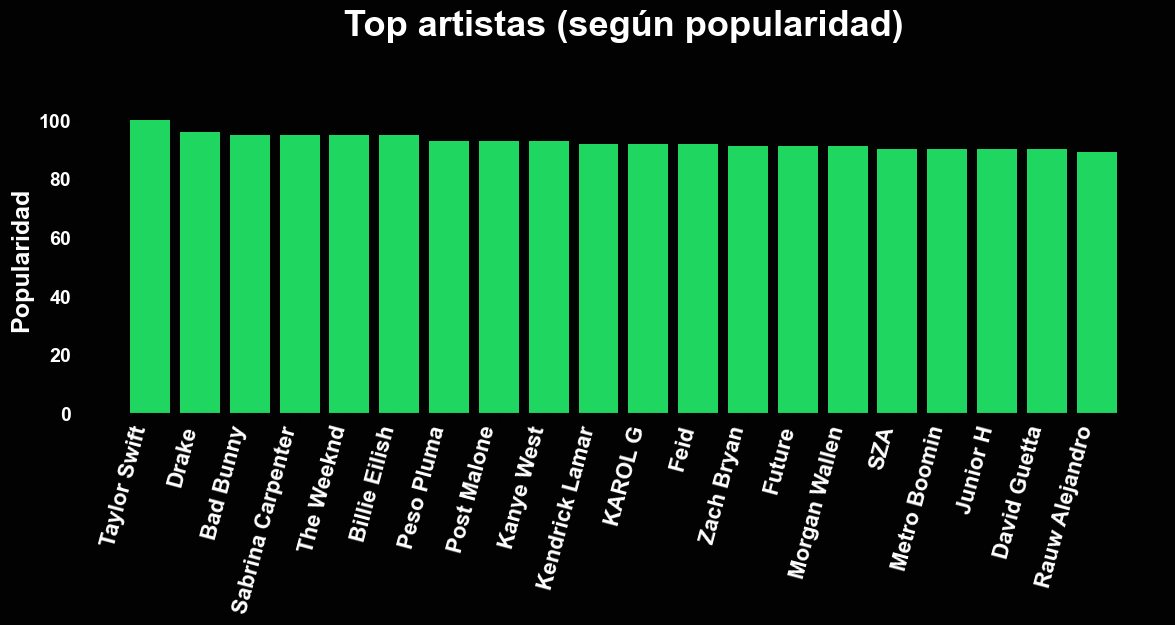

In [24]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['popularidad_artista'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según popularidad)", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

In [41]:
top_generos = pd.Series([x for _list in track_df['generos_artista'] for x in _list]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 'count':'frecuencia'})
top_generos.index = np.arange(1, len(top_generos)+1)
top_generos

generos  frecuencia
1                        rap         148
2                        pop         145
3                    hip hop          57
4      singer-songwriter pop          54
5              urbano latino          52
6                trap latino          50
7               sad sierreno          49
8                        r&b          47
9         modern country pop          47
10                   corrido          46
11      contemporary country          43
12                 reggaeton          42
13                   pop rap          41
14                pov: indie          41
15                      trap          36
16                  sierreno          35
17         corridos tumbados          33
18  classic oklahoma country          32
19               white noise          32
20               melodic rap          26

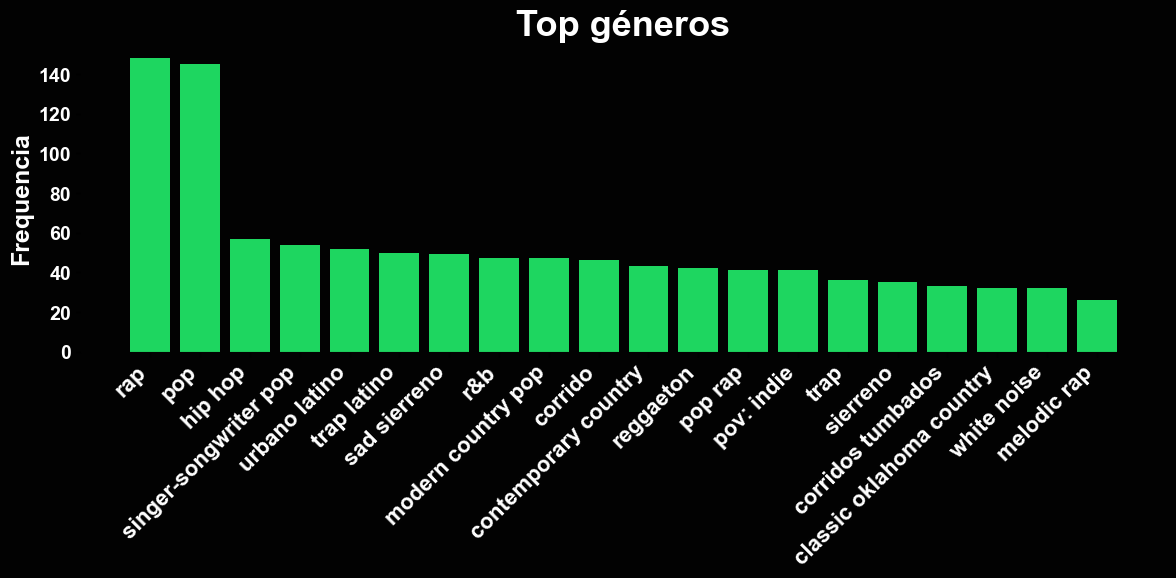

In [44]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_generos['generos'], top_generos['frecuencia'], color='#1ED660')
ax.set_ylabel("Frequencia", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

In [47]:
by_artista_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'],ascending=False)[['popularidad_artista','nombre_artista','generos_artista','id_artista']])
by_artista_pop.astype(str).drop_duplicates().head(20)
by_artista_pop
top_artistas_por_genero = []
for genero in top_generos['generos'].to_list():
  for index, row in by_artista_pop.iterrows():
    if genero in row['generos_artista']:
      top_artistas_por_genero.append({'nombre_artista':row['nombre_artista'], 'popularidad_artista':row['popularidad_artista'],'generos':genero})
      break
top_artistas_por_genero = pd.json_normalize(top_artistas_por_genero)
top_artistas_por_genero = top_artistas_por_genero.merge(top_generos, on='generos', how='left')
top_artistas_por_genero

nombre_artista  popularidad_artista                   generos  frecuencia
0           Drake                   96                       rap         148
1    Taylor Swift                  100                       pop         145
2           Drake                   96                   hip hop          57
3      Noah Kahan                   87     singer-songwriter pop          54
4       Bad Bunny                   95             urbano latino          52
5       Bad Bunny                   95               trap latino          50
6      Peso Pluma                   93              sad sierreno          49
7             SZA                   90                       r&b          47
8       Shaboozey                   81        modern country pop          47
9        Junior H                   90                   corrido          46
10  Morgan Wallen                   91      contemporary country          43
11      Bad Bunny                   95                 reggaeton          42
12          Drake                   96                   pop rap          41
13     Noah Kahan                   87                pov: indie          41
14         Future                   91                      trap          36
15       Junior H                   90                  sierreno          35
16     Peso Pluma                   93         corridos tumbados          33
17     Zach Bryan                   91  classic oklahoma country          32
18   Milli Hughes                   70               white noise          32
19    Post Malone                   93               melodic rap          26

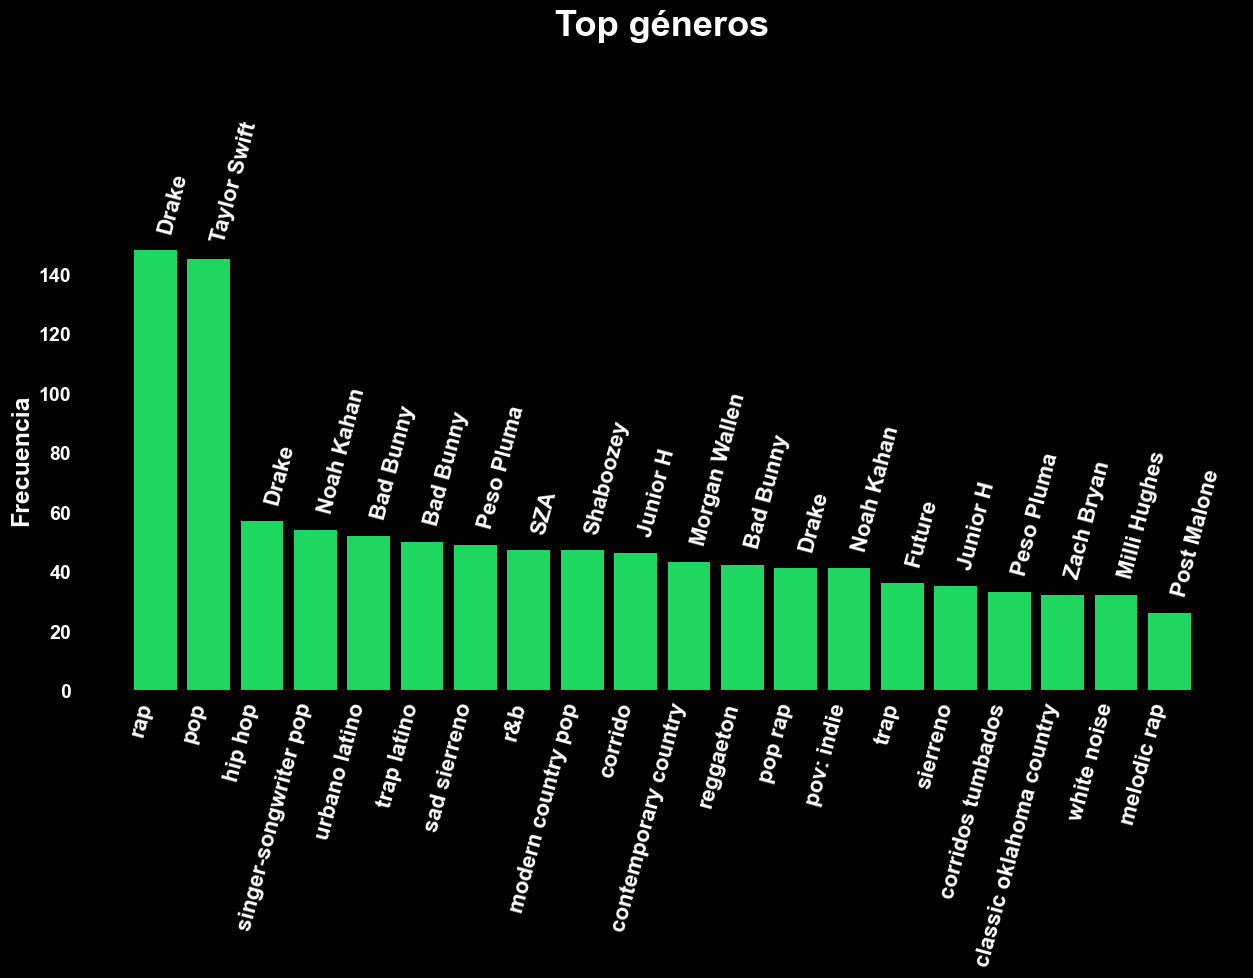

In [50]:
plt.figure(figsize=(15,6), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas_por_genero['generos'], top_artistas_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.4)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_artistas_por_genero['nombre_artista'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Arial', color='white', size=16, rotation=75, weight='bold')
plt.show()

In [51]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_cancion'],ascending=False)[['popularidad_cancion','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad_cancion':row['popularidad_cancion'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on='generos', how='left')
top_canciones_por_genero

nombre_cancion  popularidad_cancion  \
0                                     Kill Bill                   87   
1                                     As It Was                   89   
2               WAIT FOR U (feat. Drake & Tems)                   84   
3                                  Stick Season                   89   
4                               Me Porto Bonito                   84   
5                               Me Porto Bonito                   84   
6                                  Extssy Model                   82   
7                                     Kill Bill                   87   
8                                   Porch Light                   80   
9                                  Extssy Model                   82   
10                     The Kind of Love We Make                   80   
11                              Me Porto Bonito                   84   
12                Jimmy Cooks (feat. 21 Savage)                   82   
13                             End of Beginning                   92   
14              WAIT FOR U (feat. Drake & Tems)                   84   
15                                 Extssy Model                   82   
16                                 Extssy Model                   82   
17                      Something in the Orange                   87   
18                           Deep Phase Noise 1                   86   
19  I Like You (A Happier Song) (with Doja Cat)                   78   

                     generos  frecuencia  
0                        rap         148  
1                        pop         145  
2                    hip hop          57  
3      singer-songwriter pop          54  
4              urbano latino          52  
5                trap latino          50  
6               sad sierreno          49  
7                        r&b          47  
8         modern country pop          47  
9                    corrido          46  
10      contemporary country          43  
11                 reggaeton          42  
12                   pop rap          41  
13                pov: indie          41  
14                      trap          36  
15                  sierreno          35  
16         corridos tumbados          33  
17  classic oklahoma country          32  
18               white noise          32  
19               melodic rap          26

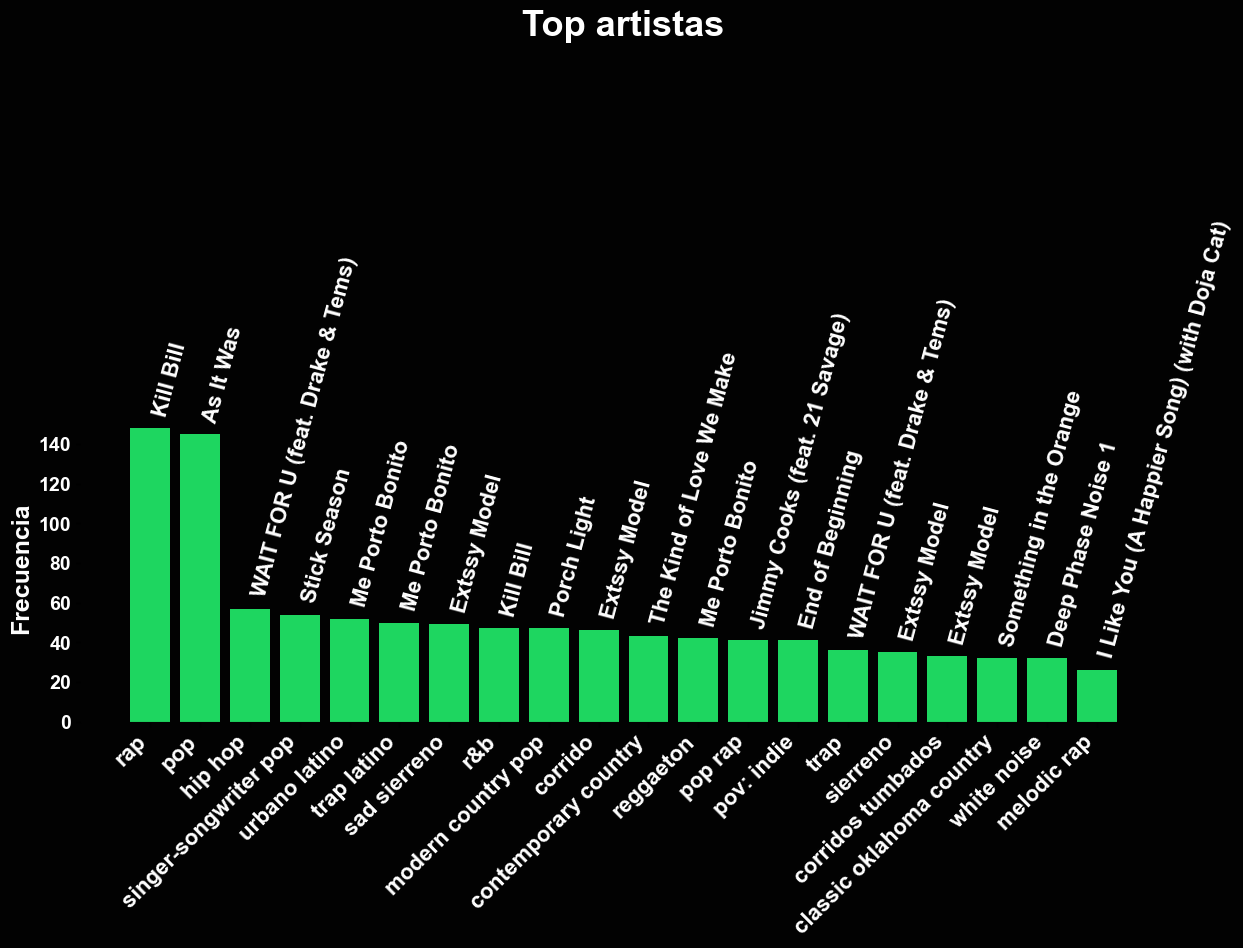

In [53]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones_por_genero['generos'], top_canciones_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=2.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_canciones_por_genero['nombre_cancion'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Arial', color='white', size=16, rotation=75, weight='bold')

plt.show()

In [63]:
# Crear un dataframe con las variables de las top 100 canciones
var_canc_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_var = pd.DataFrame(columns=var_canc_cols)

for i, track in by_track_pop[:100].iterrows():
    variables = tf_df[tf_df['id'] == track['id_cancion']]
    top_100_var = pd.concat([top_100_var, variables], ignore_index=True)

top_100_var = top_100_var[var_canc_cols]

# Crear un dataframe con los valores medios
mean_vals = pd.DataFrame(columns=var_canc_cols)

# Usar pd.concat en lugar de append
mean_vals = pd.concat([mean_vals, pd.DataFrame([top_100_var.mean()], columns=var_canc_cols)], ignore_index=True)
mean_vals = pd.concat([mean_vals, pd.DataFrame([tf_df[var_canc_cols].mean()], columns=var_canc_cols)], ignore_index=True)

mean_vals

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23448\1978621310.py:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23448\1978621310.py:15: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.635949  0.588466     0.082949      0.305806          0.025576   
1      0.627673  0.582164     0.104881      0.307742          0.082253   

   liveness   valence  
0  0.198045  0.474466  
1  0.184662  0.463027

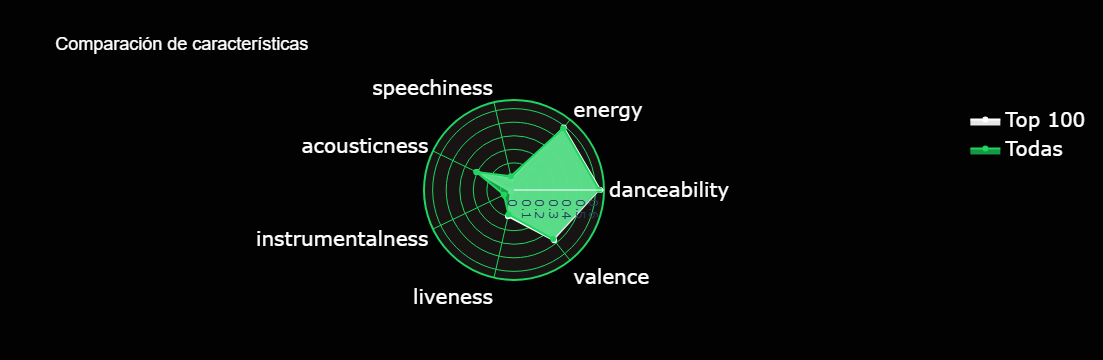

In [64]:
fig = go.Figure(data=[go.Scatterpolar(r=mean_vals.iloc[0], theta=var_canc_cols, fill='toself', name='Top 100', line_color='#FFFFFF', fillcolor='rgba(255,255,255,0.9)'),
                      go.Scatterpolar(r=mean_vals.iloc[1], theta=var_canc_cols, fill='toself', name='Todas', line_color='rgb(30,214,96)', fillcolor='rgba(30,214,96,0.7)')],
                layout=go.Layout(title=go.layout.Title(text='Comparación de características'),
                                 polar={'radialaxis': {'visible': True}},
                                 showlegend=True, plot_bgcolor='#020202', paper_bgcolor='#020202'))
fig.update_layout(title=dict(text='Comparación de características',
                             font=dict(family="sans-serif", 
                                       size = 18,
                                       color='#FFFFFF')),
                 legend=dict(font=dict(size=20, color='#FFFFFF')))
fig.update_xaxes(title_font_color='#FFFFFF')
fig.update_yaxes(title_font_color='#FFFFFF') 
fig.update_polars(angularaxis_color='#FFFFFF', angularaxis_tickfont_size=20, angularaxis_linecolor='#1ED660', angularaxis_linewidth=2, angularaxis_gridcolor='#1ED660', angularaxis_tickcolor='#1DB954',
                 bgcolor='rgba(25,20,20,1)', radialaxis_gridcolor='#1ED660')
fig.show() 